In [1]:
import numpy as np 
import PIL.Image as Image
from skimage import morphology
import matplotlib.pyplot as plt

import vvg_tools
import vvg_loader

In [2]:
segmentation = np.array(Image.open('../../data/segmentations/model_Basic2_2OD_Anonym_9_3946820_svc.png'))
segmentation = np.where(segmentation == 255, 1, segmentation)
df_edges, df_nodes = vvg_loader.vvg_to_df('../../data/graph_extracted_full/model_Basic2_2OD_Anonym_9_3946820_svc_full_graph.json')

In [5]:
print(segmentation.shape)

(2048, 2048)


In [3]:
seg = segmentation
vvg_df_edges = df_edges
vvg_df_nodes = df_nodes

final_seg_label = np.zeros_like(seg, dtype=np.uint16)
final_seg_label[seg != 0] = 1

cl_vessel = vvg_tools.vvg_df_to_centerline_array_unique_label(
    vvg_df_edges, vvg_df_nodes, (2048, 2048), vessel_only=True
)
label_cl = cl_vessel  # measure.label(cl_vessel)
label_cl[label_cl != 0] = label_cl[label_cl != 0] + 1
final_seg_label[label_cl != 0] = label_cl[label_cl != 0]

for i in range(100):
    label_cl = morphology.dilation(label_cl, morphology.square(3))

    label_cl = label_cl * seg

    # get the values of final_seg_label where no semantic segmentation is present
    final_seg_label[final_seg_label == 1] = label_cl[final_seg_label == 1]
    # get indices where label_cl==0 and seg !=0
    mask = (final_seg_label == 0) & (seg != 0)
    final_seg_label[mask] = 1

# pixels that are still 1 are turned into 0
final_seg_label[final_seg_label == 1] = 0
# labels for the rest are corrected by -1
final_seg_label[final_seg_label != 0] = (
    final_seg_label[final_seg_label != 0] - 1
)

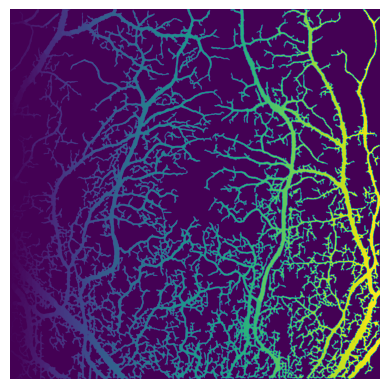

In [4]:
plt.figure()
plt.imshow(final_seg_label)
plt.axis('off')
plt.savefig('./colour_graphs/Basic2_2OD_color_full_graph.png')

In [41]:
img = Image.open('./colour_graphs/Basic2_2OD_color_full_graph.png')
print(img.size)

(640, 480)
